In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [150]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [151]:
# read data
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

In [152]:
# print first five rows of train data
train_data.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [153]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [154]:
print("Total number of rows in training data ", train_data.shape[0])
print("Total number of columns in training data ", train_data.shape[1])
print("Total number of rows in test data ", test_data.shape[0])
print("Total number of columns in test data ", test_data.shape[1])



Total number of rows in training data  891
Total number of columns in training data  12
Total number of rows in test data  418
Total number of columns in test data  11


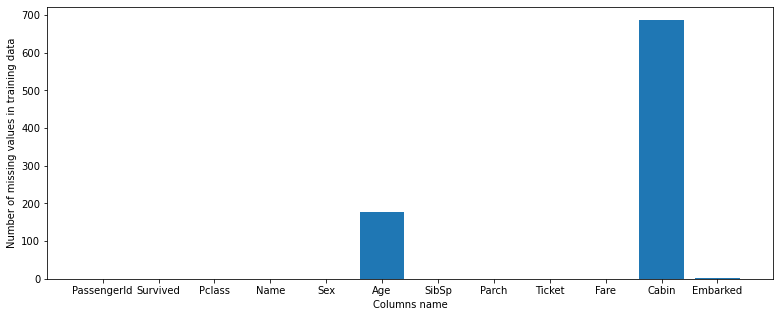

In [155]:
# Data visualization and Analysis
# Visualizing the number of null values in both data

plt.figure(figsize = (13,5))
plt.bar(train_data.columns, train_data.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.show()
# from the bar plot of missing value we can conclude that Cabin, Embarked and Cabin column has null value so, we 
# can either drop the entire row or can fill the nan value with some values like mean, meadian. 



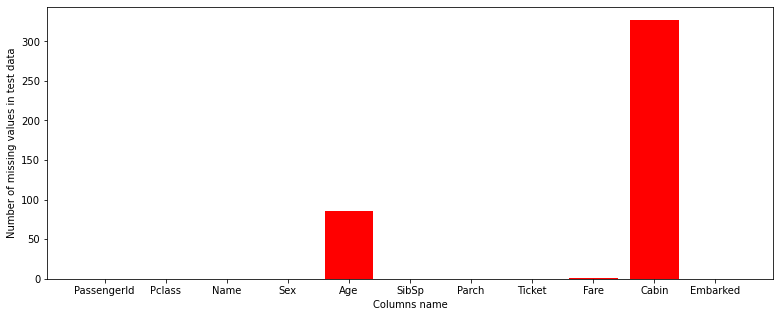

In [156]:
plt.figure(figsize=(13, 5))
plt.bar(test_data.columns, test_data.isnull().sum().values, color='red')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in test data")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


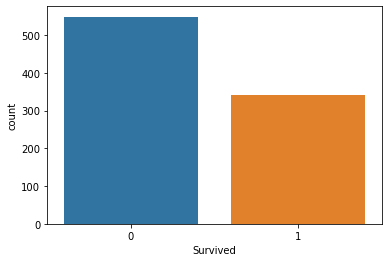

In [157]:
#Visualizing the Number of survived passenger

sns.countplot('Survived', data=train_data)
plt.show()
# here we plot only for train_data as we donot have Survived column for test data,
# This plot show that around 600 people died while around 300 survived

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


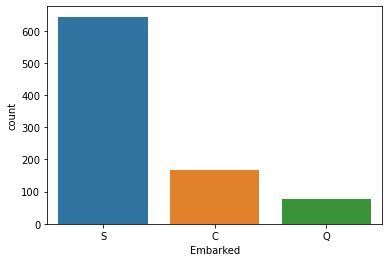

In [158]:
# visualizing the number of passenger from different embarked column in train_data
sns.countplot('Embarked', data = train_data)
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

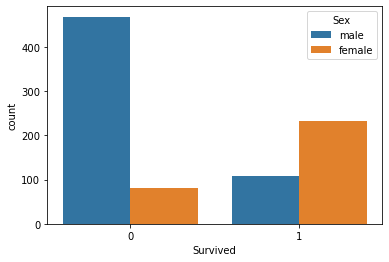

In [159]:
#visualizing whether gender affect the survival rate or not
sns.countplot('Survived', hue = 'Sex', data = train_data)
plt.plot()   # show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


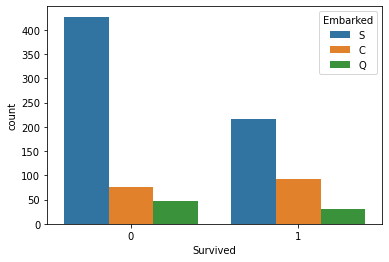

In [160]:
# visualizing whether embarked place affects the survival rate or not
sns.countplot('Survived', hue = 'Embarked', data = train_data)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


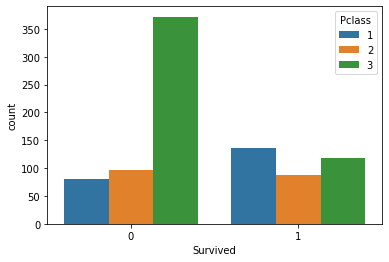

In [161]:
# visualizing whether pclass affect the survial rate or not
sns.countplot('Survived', hue = 'Pclass', data = train_data)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


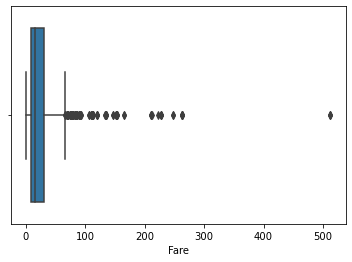

In [162]:
# Box and whisker plot
sns.boxplot('Fare', data = train_data)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


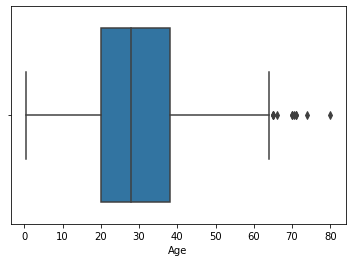

In [163]:
sns.boxplot('Age', data = train_data)
plt.show()

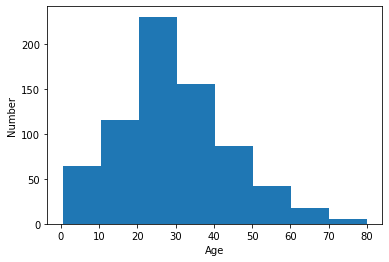

In [164]:
# plot histogram
interval = 10
value_for_bin = np.ceil((train_data.Age.max() - train_data.Age.min()) / interval).astype(int)
plt.hist(train_data.Age, bins = value_for_bin)
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

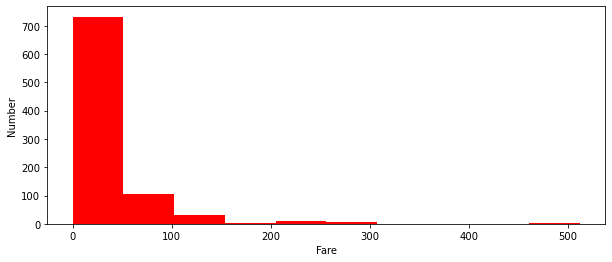

In [165]:
plt.figure(figsize = (10, 4))
plt.hist(train_data.Fare, bins = 10, color = 'red')
plt.xlabel('Fare')
plt.ylabel('Number')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


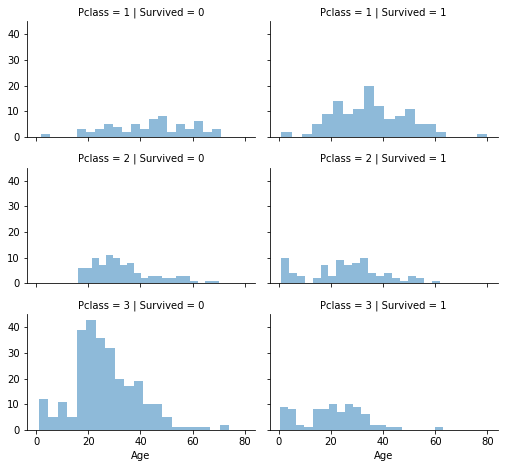

In [166]:
grid = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


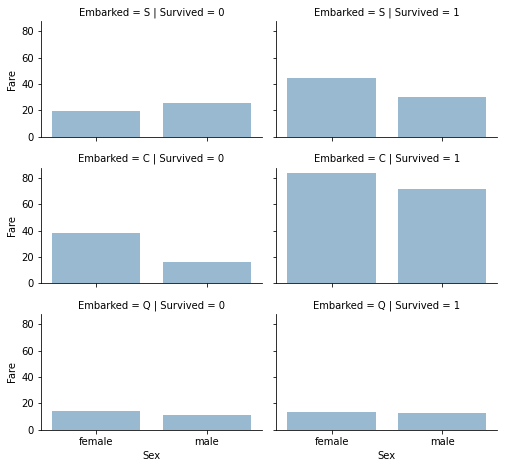

In [167]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

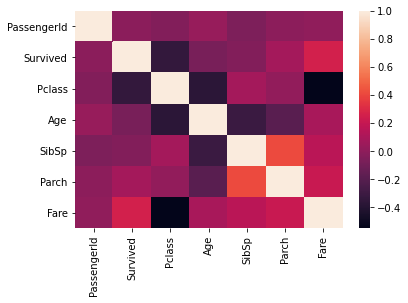

In [168]:
# Simple Data Analysis¶

corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()
# this shows that SibSp and Parch columns are releted , so we can combine this two column to reduce the dimension
# of our data.. this plot only works for columns with numercal data 


In [169]:
(train_data.groupby(['Sex', 'Survived']).Survived.count() * 100) / train_data.groupby('Sex').Survived.count()
# this shows that female have around 74% chance of survival while male have around 81% chance of death

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [170]:
(train_data.groupby(['Pclass','Survived']).Survived.count() * 100) / train_data.groupby('Pclass').Survived.count()
# this shows that people belonging to third class are likely to die while people in class one are likely to survive

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [171]:
#Survival rate on the basis of Embarked place
(train_data.groupby(['Embarked','Survived']).Survived.count() * 100) / train_data.groupby('Embarked').Survived.count()
# this shows that people who embarked from Southampton are likely to die


Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

In [172]:
train_data.groupby(by=['Survived']).mean()["Age"]
# this show that average age of people who survived was around 28 years old

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [173]:
 # Dealing with the Missing values¶

# before filling the missing values, let's drop Cabin column from both data.
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)


In [174]:
combined_data = [train_data, test_data]

for data in combined_data:
    print(data.isnull().sum())
    print ("*" * 20)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
********************
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
********************


In [175]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [176]:
#filling the nan values fo Age and fare column with the mean while Embarked column with most_frequent value

for data in combined_data:
    data.Age.fillna(data.Age.mean(), inplace = True)
    data.Fare.fillna(data.Fare.mean(), inplace = True)

    # from visualization we know that Southamptom is most frequent Embarked place so, filling the missing value 
# with 'S'
train_data.Embarked.fillna('S', inplace = True)

# we simply can use SimpleImputer class form the sklearn to deal with the missing value
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# train_data[['Age']] = impute.fit_transform(train_data[['Age']])
    

In [177]:
# Converting a categorical feature¶  label encoding
# Let's start by converting Sex feature to categorical female=1 and male=0

def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
train_data.Sex = train_data.Sex.apply(change_gender)
test_data.Sex = test_data.Sex.apply(change_gender)

# we simply can use mapfunction to change the gender
# train_data.Sex = train_data.Sex.map({'female':1, 'male':0})


In [178]:
# using map funcion to change the Embarked column S = 1, C = 2, Q = 0
change = {'S':1, 'C':2, 'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


**Feature Extraction**

In [179]:
#while visualizing the correlation heatmap we came to know that Sibsp and Parch columns were closely related so lets created new column called Alone using this two columns -------> 1 = Alone , 0 = not Alone

train_data['Alone'] = train_data.SibSp + train_data.Parch
test_data['Alone'] = test_data.SibSp + test_data.Parch

train_data.Alone = train_data.Alone.apply(lambda x: 1 if x == 0 else 0)
test_data.Alone = test_data.Alone.apply(lambda x: 1 if x == 0 else 0)

In [180]:
# drop SibSp and Parch
train_data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)



Creating new feature Title extracting from existing feature Name


In [181]:
train_data.Name.str.extract('([A-Za-z]+)\.', expand = False).unique().size

# create the Title feature which contain the title of the passenger and drop Name column
for data in combined_data:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand = False)
    data.drop('Name', axis = 1, inplace = True)
    

In [182]:
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Countess      1
Capt          1
Don           1
Mme           1
Sir           1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [183]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Alone,Title
0,1,0,3,0,22.0,A/5 21171,7.2500,1,0,Mr
1,2,1,1,1,38.0,PC 17599,71.2833,2,0,Mrs
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,1,1,Miss
3,4,1,1,1,35.0,113803,53.1000,1,0,Mrs
4,5,0,3,0,35.0,373450,8.0500,1,1,Mr


In [184]:
train_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [185]:
# replace least occuring title in the data with rare
least_occuring = [ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Dona',
       'Jonkheer']
for data in combined_data:
    data.Title = data.Title.replace(least_occuring, 'Rare')
    

In [186]:
#perform title mapping in order to change to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combined_data:
    data['Title'] = data['Title'].map(title_mapping)

train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Alone,Title
0,1,0,3,0,22.0,A/5 21171,7.2500,1,0,1
1,2,1,1,1,38.0,PC 17599,71.2833,2,0,3
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,1,1,2
3,4,1,1,1,35.0,113803,53.1000,1,0,3
4,5,0,3,0,35.0,373450,8.0500,1,1,1


In [187]:
# columns_to_drop = ['PassengerId','Ticket']
columns_to_drop = ['PassengerId', 'Ticket']
train_data.drop(columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns_to_drop[1], axis = 1, inplace = True)

In [188]:
train_data.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,22.0,7.2500,1,0,1
1,1,1,1,38.0,71.2833,2,0,3
2,1,3,1,26.0,7.9250,1,1,2
3,1,1,1,35.0,53.1000,1,0,3
4,0,3,0,35.0,8.0500,1,1,1



**Binning Age and Fare columns**

In [189]:
for dataset in combined_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4


In [190]:
for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 2
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 3
    data.loc[(data['Fare'] >= 100),'Fare'] = 4
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,1.0,1.0,1,0,1
1,1,1,1,2.0,3.0,2,0,3
2,1,3,1,1.0,1.0,1,1,2
3,1,1,1,2.0,3.0,1,0,3
4,0,3,0,2.0,1.0,1,1,1


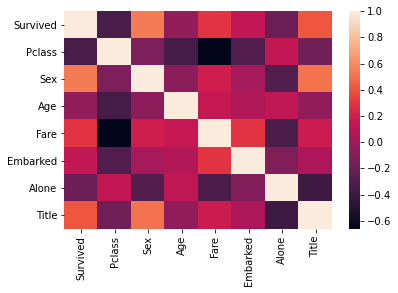

In [191]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()


**preparing training and testing data **

In [ ]:
# https://www.kaggle.com/dansbecker/running-kaggle-kernels-with-a-gpu
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    print('using device: cuda')
else:
    print('using device: cpu')

In [ ]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

In [ ]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()